In [1]:
import pandas as pd
import numpy as np
import os

In [ ]:
!jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

/Users/yanyifu/Documents/_Coding/Python/StockGPTv1/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[I 2023-08-02 15:23:25.447 ServerApp] Package notebook took 0.0000s to import
[I 2023-08-02 15:23:25.456 ServerApp] Package jupyter_lsp took 0.0090s to import
[W 2023-08-02 15:23:25.456 ServerApp] A `_jupyter_server_extension_points` function was not found in jupyter_lsp. Instead, a `_jupyter_server_extension_paths` function was found and will be used for now. This function name will be deprecated in future releases of Jupyter Server.
[I 2023-08-02 15:23:25.462 ServerApp] Package jupyter_server_terminals took 0.0057s to import
[I 2023-08-02 15:23:25.462 ServerApp] Package jupyterlab took 0.0000s to import
[I 2023-08-02 15:23:25.485 ServerApp] Package notebook_shim took 0.0000s to import
[W 

In [6]:
# 載入所有資料
full_tx_data = []
m = '202305'
data_m = '202305'

for i in range(9,31):
    filepath = 'data/202305/'
    filename = 'Daily_2023_05_' + str(i+1) + '.csv'
    filepath = filepath + filename
    if os.path.exists(filepath):
        print(filepath + "File is available.")
        df = pd.read_csv(filepath, encoding= 'big5')
        df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
        # print(df.head())
        data_m = '202305' if i+1 < 17 else '202306'
        tx_data = df[(df['商品代號'] == 'TX') & (df['到期月份(週別)'] == data_m)]
        tx_data = tx_data['成交價格']
        
        df = pd.DataFrame(tx_data)
        # Transpose the column to a row
        data = df.values.reshape(1, -1).ravel()
        # print(data)
        full_tx_data = np.concatenate((full_tx_data, data))
        # full_tx_data = pd.concat([full_tx_data, data], axis=0)
    else:
        print(filepath + "File is not available.")
print(full_tx_data)
len(full_tx_data)

# 使用 to_csv() 方法寫入 CSV 檔案，指定檔案路徑和檔案名稱
# tx_df.to_csv('data/tx_data.csv', index=False)  # 如果不想寫入索引，設定 index=False
np.savetxt('data/tx_data.csv', full_tx_data, delimiter=',', fmt='%d')

data/202305/Daily_2023_05_10.csvFile is available.
data/202305/Daily_2023_05_11.csvFile is available.
data/202305/Daily_2023_05_12.csvFile is available.
data/202305/Daily_2023_05_13.csvFile is not available.
data/202305/Daily_2023_05_14.csvFile is not available.
data/202305/Daily_2023_05_15.csvFile is available.
data/202305/Daily_2023_05_16.csvFile is available.
data/202305/Daily_2023_05_17.csvFile is available.
data/202305/Daily_2023_05_18.csvFile is available.
data/202305/Daily_2023_05_19.csvFile is available.
data/202305/Daily_2023_05_20.csvFile is not available.
data/202305/Daily_2023_05_21.csvFile is not available.
data/202305/Daily_2023_05_22.csvFile is available.
data/202305/Daily_2023_05_23.csvFile is available.
data/202305/Daily_2023_05_24.csvFile is available.
data/202305/Daily_2023_05_25.csvFile is available.
data/202305/Daily_2023_05_26.csvFile is not available.
data/202305/Daily_2023_05_27.csvFile is not available.
data/202305/Daily_2023_05_28.csvFile is not available.
dat

In [4]:
# normalize
filepath = "data/tx_data.csv"
data_array = [0]
if os.path.exists(filepath):
    print(filepath + "File is available.")
    df = pd.read_csv(filepath, encoding= 'big5')
    df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    data_array = df.to_numpy().ravel()
    data_array = data_array[:140000]
    print(data_array, len(data_array))
else:
    print(filepath + "File is not available.")
    
def normalize_data(data):
    min_val = min(data)
    max_val = max(data)
    normalized_data = [(val - min_val) / (max_val - min_val) for val in data]
    return normalized_data, min_val, max_val

def denormalize_data(normalized_data, min_val, max_val):
    denormalized_data = [val * (max_val - min_val) + min_val for val in normalized_data]
    return denormalized_data

# 正規化數據
normalized_data, min_val, max_val = normalize_data(data_array)
print("Normalized Data:")
print(normalized_data)
np.savetxt('data/tx_data_norm.csv', normalized_data, delimiter=',', fmt='%f')

data/tx_data.csvFile is available.
[15724 15725 15725 ... 15587 15587 15587] 140000
Normalized Data:
[0.9644670050761421, 0.9695431472081218, 0.9695431472081218, 0.9695431472081218, 0.9644670050761421, 0.9746192893401016, 0.9796954314720813, 0.9796954314720813, 0.9746192893401016, 0.9746192893401016, 0.9796954314720813, 0.9746192893401016, 0.9796954314720813, 0.9847715736040609, 0.9847715736040609, 0.9847715736040609, 0.9898477157360406, 0.9796954314720813, 0.9796954314720813, 0.9796954314720813, 0.9898477157360406, 0.9898477157360406, 0.9898477157360406, 0.9898477157360406, 0.9847715736040609, 0.9847715736040609, 0.9847715736040609, 0.9898477157360406, 0.9898477157360406, 0.9898477157360406, 0.9847715736040609, 0.9847715736040609, 0.9796954314720813, 0.9796954314720813, 0.9796954314720813, 0.9746192893401016, 0.9746192893401016, 0.9796954314720813, 0.9847715736040609, 0.9796954314720813, 0.9746192893401016, 0.9746192893401016, 0.9746192893401016, 0.9746192893401016, 0.9796954314720813

[0.647036, 0.681701, 0.786497, 1.305508, 1.472455, -1.713527, -2.944451, 0.356309, 0.427805, -2.029923] 100


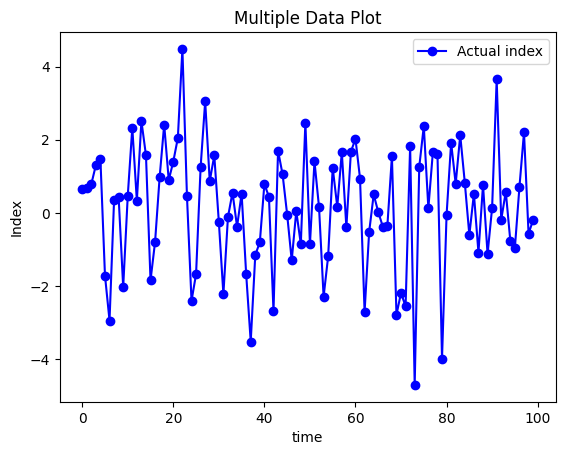

In [18]:
import matplotlib.pyplot as plt
data_array = [0.647036,0.681701,0.786497,1.305508,1.472455,-1.713527,-2.944451,0.356309,0.427805,-2.029923,0.461445,2.329771,0.331937,2.514605,1.574073,-1.847968,-0.793436,0.974644,2.416111,0.897150,1.403792,2.049180,4.486014,0.461657,-2.407594,-1.675135,1.251413,3.052800,0.867465,1.570393,-0.247005,-2.223184,-0.113306,0.555682,-0.376393,0.527846,-1.673011,-3.521269,-1.155244,-0.798847,0.787710,0.442605,-2.691013,1.701285,1.050438,-0.045786,-1.300312,0.047630,-0.851303,2.470763,-0.859298,1.409420,0.150950,-2.293266,-1.191296,1.234242,0.168835,1.659035,-0.391412,1.677581,2.024978,0.939562,-2.709687,-0.523062,
0.504185,0.022487,-0.373525,-0.359442,1.548492,-2.787774,-2.185133,-2.561009,1.821862,-4.706672,1.255965,2.374388,0.128844,1.675465,1.622847,-3.986911,-0.056421,1.922524,0.794171,2.124925,0.830788,-0.604509,0.521877,-1.085337,0.764601,-1.125658,0.140404,3.650071,-0.187298,0.579701,-0.768300,-0.954668,0.711340,2.202935,-0.566518,-0.197262,-2.343119,-1.837827,-2.755120,0.563569,1.699220,-0.533008,-2.269767,0.767908,-0.687802,-0.001516,-2.305537,-0.393184,1.465233,2.495392,-0.782256,-0.035639,-0.013308,0.968007,-0.822356,0.044790,-2.121486,2.265715,1.406687,-0.023972,-1.305154,0.092369,-1.596801,-0.253164,
0.761724,0.479313,-2.164470,0.814751,2.297012,-1.185380,-1.541023,-0.480209,0.947167,0.405100,2.592621,1.847140,-1.503591,1.743477,1.525594,-1.626457,0.006202,2.699306,2.402878,1.954598,-0.349100,-0.091334,0.545077,0.742013,0.919385,-2.042597,0.069610,3.479821,1.956581,0.114642,-0.944713,0.006243,0.446940,-0.813130,1.790393,1.245098,-2.138190,-1.079481,1.187061,-0.468565,-0.067321,-0.220663,-3.613425,0.672636,0.679131,-0.173323,-2.121044,1.240966,-1.890856,1.760137,-0.422553,0.634509,-0.540691,-1.684902,-0.609331,0.477179,0.254352,1.664921,1.394269,0.557770,-0.405932,0.079872,-0.810791,0.446247,
1.441017,1.761851,-0.982226,0.202717,0.429172,1.358622,-1.549128,-1.389002,-0.939401,0.063844,-0.483399,-2.872714,-1.478353,2.332861,0.894341,1.967839,0.295063,-0.244367,-0.281257,0.183013,1.993774,0.174936,-0.275871,-1.687869,0.596011,-0.875998,0.487108,1.103055,-0.292541,-0.994017,2.110753,-0.591898,1.349434,1.209455,-0.818143,-1.037986,-3.005786,0.359782,-1.081869,-1.060985,-0.934851,1.787616,2.112094,-2.729987,3.693420,0.198999,-0.846319,0.932491,1.774119,2.323980,-0.100583,0.526579,1.583030,-1.574740,-0.740934,0.672845,-1.875556,-0.160693,0.402834,-3.685642,1.048055,0.788552,-0.769789,-2.386029,
2.258983,0.116035,-1.918081,0.996763,1.447206,1.337664,-0.777966,-1.674703,0.082779,-1.219055,-1.731447,-1.483472,0.879805,4.051955,0.655922,0.104176,0.691752,-0.529208,-0.020511,1.944426,-1.440889,-1.030055,-1.299435,-1.352146,0.344172,0.537510,-0.108534,0.270057,-0.683094,0.943934,1.588505,-0.503339,0.736424,1.187887,0.540420,-0.993439,-1.517790,1.114531,1.147051,0.182623,-0.159302,0.762121,4.100419,-0.019005,0.577175,-1.510395,1.153973,-1.769382,2.895917,0.829414,-0.686432,2.557017,1.022005,-1.464738,-0.520309,0.171456,-2.049788,0.022678,0.507191,-3.855937,1.758768,1.854651,-0.779049,-0.999191,
0.622024,0.891284,1.093430,0.840465,0.506279,0.161379,-3.950689,-0.937973,0.722041,-0.747490,1.822346,0.649856,-0.540680,3.238997,2.459439,-1.279236,1.592436,1.471498,-0.000261,2.745407,-0.567455,-1.017171,2.802830,0.154122,-0.907782,-1.438614,-1.285194,4.845002,3.406498,0.619525,0.313625,0.241476,-1.387778,0.464613,-0.232404,-3.153727,-2.176539,-3.246382,-0.815622,0.088278,0.193131,0.263666,-2.982119,2.208209,-0.747131,0.050040,-2.915513,1.229240,-0.669781,1.391011,-0.718381,-1.052276,-0.239652,-0.331670,-0.984097,-0.252616,1.022838,1.877716,0.983513,0.962220,0.850318,1.901092,-1.770958,-0.379413,
1.451772,1.320510,0.897395,-0.103369,1.086864,-0.065838,-0.979959,0.226419,1.581160,-1.245571,1.789197,0.131854,-0.648053,1.146089,1.162666,-2.174987,0.360576,1.926187,0.622835,3.038769,1.856233,-1.003880,0.544512,0.123898,-0.904551,-0.196803,0.090281,2.502804,0.123674,-1.280909,-0.082133,-0.991509,-1.007448,0.796788,0.455819,-2.179983,-0.687396,-2.612025,1.138674,-0.329530,-0.884957,-0.237342,-2.987763,1.349097,1.125606,-0.693094,-1.077667,-0.664304,-1.800951,-0.933790,0.744166,0.059510,-0.274794,-0.156335,-1.643255,2.269712,1.251486,1.263278,-1.034391,1.735830,0.425412,0.405208,-0.406222,0.972607,
1.058451,2.233828,0.788469,0.484967,0.907881,0.034262,-0.689021,-2.383085,0.471288,-0.873466,1.715800,0.364802,2.981800,0.499994,-1.060331,-0.312279,0.619645,2.517461,-0.218531,1.369309,-0.709899,-0.014222,1.993318,-0.310531,-0.063772,1.596016,0.748600,2.697082,3.720645,1.855710,-0.013309,-0.634695,-0.683404,0.909515,0.562270,-0.616055,-0.666206,-2.063555,0.172834,1.323426,-0.136213,0.852088,-1.514877,1.023577,0.927010,1.036900,-3.290058,2.399316,1.107652,-0.243995,1.067343,0.283583,-0.355745,-0.182363,0.731319,0.630938,1.271786,1.252504,0.604486,1.894612,-0.066601,0.389426,-1.649187,0.322625,
1.494598,1.627358,-2.657049,0.570773,0.908126,1.180586,-0.223852,-0.166567,-0.313374,-2.108219,1.163813,0.559286,1.698781,0.760078,-0.327894,1.825192,-1.154807,0.499401,-0.034228,0.463631,1.779467,1.158512,1.968640,1.530776,-0.944870,0.623459,-0.340702,3.574140,-0.083922,2.019787,0.226470,-0.509083,-0.376666,0.158787,-1.628222,-1.472581,-1.182235,-3.008869,0.504592,-0.465372,-0.549871,0.394810,-1.911309,1.565729,0.514137,-0.195614,-1.197312,0.284538,-0.831069,2.375752,-0.924615,-0.872166,0.059668,0.529710,1.503676,1.604114,-1.317945,2.077491,1.986206,-0.538161,-3.033089,1.842742,-0.504213,0.566987,
1.262089,1.654447,-1.370928,-0.260877,-1.216099,0.855489,-1.940374,-1.105476,0.757074,-1.465845,0.599377,-0.143572,0.876086,2.785362,1.642034,-0.642351,-0.971118,3.760873,1.986281,1.220902,0.689146,1.231505,2.509693,0.875655,-2.327855,-0.347078,1.094994,3.444987,0.567581,-0.477223,0.787093,0.584805,-0.750216,-0.702894,-1.867546,-0.769439,-1.773159,-3.115438,0.233173,0.515491,0.617055,-1.353647,-0.984286,0.296157,-0.282552,-0.390042,-3.020306,0.919237,-1.205538,-0.778998,-0.041523,-0.453882,0.138284,0.597154,0.962443,1.316918,-0.752196,1.619461,0.003310,-0.227245,0.393279,2.361038,0.845982,-1.679100,
0.442718,0.875959,0.499868,-0.275793,-0.107434,-0.451307,-0.933454,-0.580992,0.325171,-1.496801,0.263225,0.565548,1.450943,1.957363,0.389528,-0.303035,0.880528,2.244858,1.711397,3.022489,0.776846,1.438308,1.059251,-0.371589,-1.879775,-0.761673,-0.441575,1.176957,0.823241,1.926118,-0.535709,-0.032833,-1.193859,-0.401350,-0.485995,-0.243747,-1.360048,-2.820394,-0.563320,-1.642361,0.427585,-0.763404,-2.429255,-0.014457,0.981240,1.005693,-2.813284,0.638104,-1.094018,0.919196,0.077853,-1.931114,0.456145,1.360860,-1.014199,0.037151,-0.001126,1.754294,1.021898,0.987671,-0.758916,0.969769,0.539986,-0.300292,
-1.082012,1.982527,-0.977487,1.864814,2.801562,0.652222,-0.193381,0.202206,0.560836,-0.956084,3.136652,2.035274,0.183151,2.712191,1.597673,-1.055300,-0.623905,3.975724,2.196226,2.241612,0.035074,0.653473,0.461870,-0.460883,-0.414046,0.836442,1.566703,3.379764,1.042160,-0.422887,-0.291258,-1.576926,-2.018282,-1.549909,-0.322516,-0.398460,-3.206102,-2.876731,0.507006,0.559886,-0.312537,-0.034007,-1.844325,1.937332,0.441448,-0.616037,-1.934461,1.147200,-2.509187,0.095948,-1.719184,0.169550,-0.899650,-0.999836,-1.553638,1.004597,-2.064854,-0.144349,0.012748,0.260631,0.481966,0.260021,-1.764488,1.497790,
2.651477,0.582200,-0.477034,-0.762390,1.947389,-0.558699,-1.213846,0.486198,0.402972,0.156283,1.461273,1.727552,2.779413,-0.035679,1.395002,2.258039,-1.212411,1.988941,1.403837,0.945916,0.720313,0.871004,2.231095,-0.145694,-0.328633,2.573797,2.037528,1.532437,1.780749,-0.845598,0.904162,-0.603749,-0.266516,-0.958192,0.592236,-0.439545,-0.499202,-3.048259,1.213897,-0.972570,1.418481,-0.007936,-1.672699,0.902426,0.168542,0.899361,-2.501307,0.946677,-1.544888,-1.545270,-0.455887,-0.570438,0.528941,-0.430226,-0.036184,1.061577,1.945814,1.611658,1.373017,0.628020,2.424872,-0.342317,1.868992,-0.274127
]

data_array1 = data_array[:100]

# 創建 x 軸資料，這裡假設 x 軸是數列的索引
x = np.arange(len(data_array1))
print(data_array1[:10] , len(data_array1))

# 繪製數據（使用線條圖）
# plt.plot(x, data_array1, label='Actual index', marker='o', linestyle='-', c='blue')
plt.plot(x, data_array1, label='Actual index', marker='o', linestyle='-', c='blue')

# 加入標籤和標題
plt.xlabel('time')
plt.ylabel('Index')
plt.title('Multiple Data Plot')

# 加入圖例
plt.legend()

# 顯示圖表
plt.show()